# K-Nearest Neighbour Classifier Implementation

### What parameters we need to tune?

('classes = ', array(['setosa', 'versicolor', 'virginica'], dtype='|S10'))


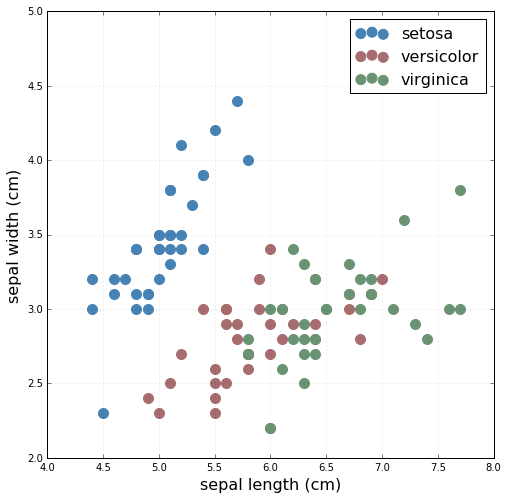

In [3]:
#Import the libraries
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
    
X_train, y_train, X_valid, y_valid, target_names = load_iris() 
print("classes = ", target_names)
plot_iris(X_train, y_train)

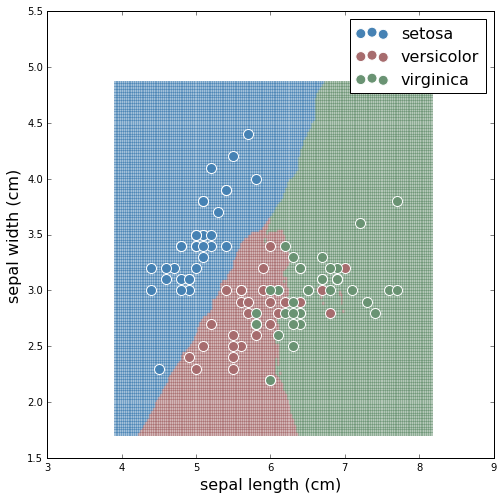

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(10).fit(X_train, y_train)
plot_knn_boundary(X_train, y_train, knn)

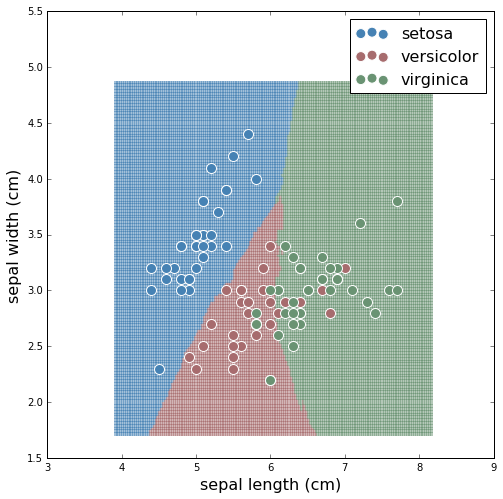

In [5]:
knn = KNeighborsClassifier(30).fit(X_train, y_train)
plot_knn_boundary(X_train, y_train, knn)

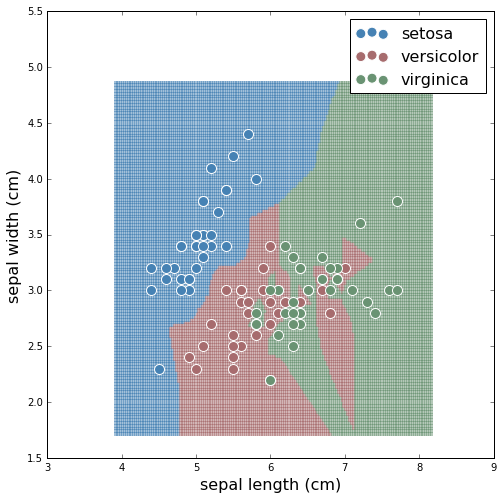

In [6]:
knn = KNeighborsClassifier(1).fit(X_train, y_train)
plot_knn_boundary(X_train, y_train, knn)

# Helper Functions

In [2]:
#Some helper functions

def load_iris(standardize=False, random_state=1234): 
    
    from sklearn import datasets
    from sklearn.preprocessing import StandardScaler 
    
    np.random.seed(random_state)
    
    # Load the data and grab first two features 
    iris = datasets.load_iris()
    X, y = iris.data[:,:2], iris.target 
        
    # Randomly split into validation and training sets 
    ones = np.ones(50, dtype=int)
    valid_mask = np.full(50, False)
    valid_mask[np.random.choice(range(50), replace=False, size=16)] = True 
    train_mask = np.logical_not(valid_mask)
    X_train = np.concatenate((X[y==0][train_mask], X[y==1][train_mask], X[y==2][train_mask]))
    y_train = np.concatenate((0 * ones[train_mask], 1 * ones[train_mask], 2 * ones[train_mask]))
    X_valid = np.concatenate((X[y==0][valid_mask], X[y==1][valid_mask], X[y==2][valid_mask]))
    y_valid = np.concatenate((0 * ones[valid_mask], 1 * ones[valid_mask], 2 * ones[valid_mask]))
    
    # Standardize data if desired 
    if standardize: 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
    return X_train, y_train, X_valid, y_valid, iris.target_names

def plot_iris(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1])
    ax.grid(alpha=0.25)
    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)
    
def plot_knn_boundary(X, y, model):
    
    from matplotlib import colors
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1], edgecolors="white", zorder=2)
    
    # Plot the decision boundary. 
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Define custom colormap 
    cmap = colors.ListedColormap(['steelblue', '#a76c6e', '#6a9373'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.5, zorder=1)

    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)

##### Code adapted from: https://github.com/BoulderDS/CSCI-4622-Machine-Learning-18fa/tree/master/notebooks